In [17]:
from dataclasses import dataclass

@dataclass
class Position:
    x: float
    y: float
    z: float
        
@dataclass
class Quaternion:
    w: float
    x: float
    y: float
    z: float

@dataclass
class TrackedPosition:
    time_stamp: int
    device: str
    pos: Position
    orn: Quaternion

In [32]:
traj = []
junk = 0
total = 0

with open("./circle.txt", "r", encoding="UTF-16") as file:
    for i, line in enumerate(file):
        total += 1
        # lines can contain junk. Needs to be fixed when
        # the data is generated. 
        try:
            data = line.split(",")
            x = float(data[2].split("= ")[-1])
            y = float(data[3].split("= ")[-1])
            z = float(data[4].split("= ")[-1])
            
            qw = float(data[5].split("= ")[-1])
            qx = float(data[6].split("= ")[-1])
            qy = float(data[7].split("= ")[-1])
            qz = float(data[8].split("= ")[-1])
            
            pos = Position(x, y, z)
            orn = Quaternion(qw, qx, qy, qz)
            tp = TrackedPosition(int(data[0]), data[1], pos, orn)
            traj.append(tp)
        except:
            junk += 1
            print(f"Junk on line {i}")

print(f"Junk Percentage: {junk / total * 100}%")

Junk on line 0
Junk on line 2
Junk on line 3
Junk on line 5
Junk on line 6
Junk on line 42
Junk on line 43
Junk on line 143
Junk on line 144
Junk on line 254
Junk on line 255
Junk on line 2635
Junk on line 2636
Junk on line 2748
Junk on line 2749
Junk on line 3263
Junk on line 3264
Junk on line 3344
Junk on line 3345
Junk on line 4271
Junk on line 4272
Junk Percentage: 0.4200840168033607%


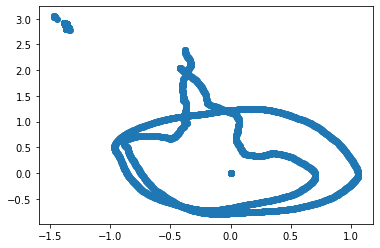

In [39]:
from matplotlib import pyplot as plt

plt.scatter([t.pos.x for t in traj], [t.pos.z for t in traj])